In [1]:
import pandas as pd  
import numpy as np
from io import StringIO

In [2]:
array_of_data_lines = []
headers = []

In [3]:
#creating the dataframe with the secondary_data_no_miss.csv file
with open('./secondary_data_no_miss.csv', 'r', encoding='utf-8') as file:
    lines = file.readlines()
    headers = (lines[0].split("\n")[0]).split(";")
    count = 1
    while(count < len(lines)):
        line = (lines[count].split("\n"))[0]
        array_of_data_lines.append(line.split(";"))
        count = count + 1

In [6]:
df = pd.DataFrame(array_of_data_lines, columns=headers)
df.shape

(61069, 16)

In [7]:
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,e,1.26,x,g,y,f,d,c,w,5.04,1.73,y,f,f,d,a
1,e,10.32,f,e,b,f,a,c,b,4.68,19.44,w,t,f,d,a
2,p,0.92,x,g,p,f,a,c,p,4.59,1.15,k,f,f,d,u
3,p,4.27,x,t,p,f,x,c,w,4.55,6.52,w,f,f,d,a
4,e,3.08,f,s,w,f,d,d,w,2.67,5.18,w,f,f,m,a


In [5]:
df.isnull().sum(axis = 0) #checking for null values 

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

In [6]:
df.nunique()

class                      2
cap-diameter            2564
cap-shape                  7
cap-surface               11
cap-color                 12
does-bruise-or-bleed       2
gill-attachment            7
gill-spacing               3
gill-color                12
stem-height             2198
stem-width              4634
stem-color                13
has-ring                   2
ring-type                  8
habitat                    8
season                     4
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
columns_to_encode = ["class", "cap-shape", "cap-surface", "cap-color", "does-bruise-or-bleed",
                    "gill-attachment", "gill-spacing", "gill-color", "stem-color",
                    "has-ring", "ring-type", "habitat", "season"] #defining the array of features that need to be encoded

In [9]:
encoder = LabelEncoder()


In [10]:
df_to_encode = df[columns_to_encode] #separating the columns that should be encoded
df_remaining = df.drop(columns=columns_to_encode) #separating the remaining columns

In [11]:
df_encoded = df_to_encode.apply(encoder.fit_transform)

In [12]:
df = pd.concat([df_encoded, df_remaining, ], axis = 1) #concatinating the both encoded and non encoded columns
df.head()

,class,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-color,has-ring,ring-type,habitat,season,cap-diameter,stem-height,stem-width
0,0,6,2,11,0,1,0,10,12,0,1,0,0,1.26,5.04,1.73
1,0,2,1,0,0,0,0,0,11,1,1,0,0,10.32,4.68,19.44
2,1,6,2,7,0,0,0,7,4,0,1,0,2,0.92,4.59,1.15
3,1,6,8,7,0,6,0,10,11,0,1,0,0,4.27,4.55,6.52
4,0,2,7,10,0,1,1,10,11,0,1,4,0,3.08,2.67,5.18


In [13]:
df["class"].value_counts()

class
1    33888
0    27181
Name: count, dtype: int64

In [14]:
#seperating the feaures and class
X = df.drop(['class'], axis=1)
y = df['class']

In [15]:
from imblearn.combine import SMOTEENN

In [16]:
os = SMOTEENN()

In [17]:
X, y = os.fit_resample(X,y)
y.value_counts()

class
0    33829
1    33783
Name: count, dtype: int64

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
sc= StandardScaler()

In [20]:
X = sc.fit_transform(X) 
X = pd.DataFrame(X, columns=headers[1::])
X.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,0.917753,-1.323429,1.538630,-0.458510,-0.513178,-0.448874,0.831260,1.106440,-0.570974,-0.301716,-0.488949,-0.959391,-1.033181,-0.470046,-1.050301
1,-0.965852,-1.648665,-1.937005,-0.458510,-0.968232,-0.448874,-2.311723,0.794244,1.751393,-0.301716,-0.488949,-0.959391,0.641001,-0.576492,0.697843
2,-0.965852,0.302747,1.222663,-0.458510,-0.513178,1.374233,0.831260,0.794244,-0.570974,-0.301716,2.614217,-0.959391,-0.696866,-1.170812,-0.709754
3,0.917753,0.302747,-0.357171,2.180977,-0.058124,-0.448874,-0.740232,0.794244,1.751393,1.090751,2.614217,-0.959391,0.746331,0.414043,0.467850
4,0.917753,-0.998194,1.538630,2.180977,1.762093,-0.448874,1.145558,0.794244,-0.570974,-0.301716,-0.488949,0.855153,-0.223808,0.272116,0.327683


In [21]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

In [22]:
fs = SelectKBest(score_func=mutual_info_classif, k = 10)
fs.fit(X,y)

SelectKBest(score_func=<function mutual_info_classif at 0x00000241DF692160>)

<Axes: >

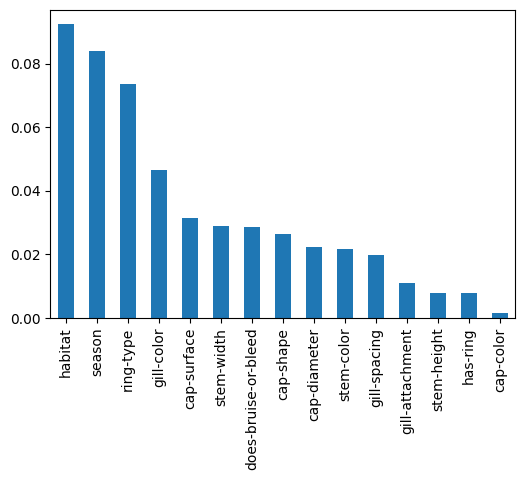

In [23]:
m_score = pd.Series(fs.scores_, index=X.columns)
m_score.sort_values(ascending=False).plot.bar(figsize=(6,4))

In [24]:
selected_columns = X.columns[fs.get_support()]
X = fs.fit_transform(X,y) #extracting the most contributing 10 features
X = pd.DataFrame(X, columns = selected_columns)
X.head()

,cap-diameter,cap-shape,cap-surface,does-bruise-or-bleed,gill-color,stem-width,stem-color,ring-type,habitat,season
0,0.917753,-1.323429,1.538630,-0.513178,0.831260,1.106440,-0.301716,-1.033181,-0.470046,-1.050301
1,-0.965852,-1.648665,-1.937005,-0.968232,-2.311723,0.794244,-0.301716,0.641001,-0.576492,0.697843
2,-0.965852,0.302747,1.222663,-0.513178,0.831260,0.794244,-0.301716,-0.696866,-1.170812,-0.709754
3,0.917753,0.302747,-0.357171,-0.058124,-0.740232,0.794244,1.090751,0.746331,0.414043,0.467850
4,0.917753,-0.998194,1.538630,1.762093,1.145558,0.794244,-0.301716,-0.223808,0.272116,0.327683


In [25]:
from sklearn.model_selection  import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
X_train.head()

,cap-diameter,cap-shape,cap-surface,does-bruise-or-bleed,gill-color,stem-width,stem-color,ring-type,habitat,season
32673,0.446852,-1.973900,0.906697,-0.513178,-0.111635,-1.703320,-0.301716,-0.600677,-0.521660,-0.611582
18057,0.917753,0.302747,-1.621038,-0.968232,0.831260,-0.766734,-0.301716,0.398929,0.863480,0.395792
54450,0.917753,-0.998194,-0.357171,1.307039,1.145558,-0.766734,-0.301716,1.139930,0.547100,0.716598
36753,0.446852,0.627982,0.274763,-0.513178,-0.111635,-0.142342,-0.301716,0.661328,0.482050,0.517205
43573,-0.494951,0.627982,-0.357171,0.396931,-1.683126,-0.766734,-0.301716,0.979164,-0.913569,1.191390


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [29]:
accuracies = {}

In [30]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
score = accuracy_score(y_test, y_pred)
accuracies["LR"] = score
print("Accuracy: ", score)

Accuracy:  0.6125859646528137


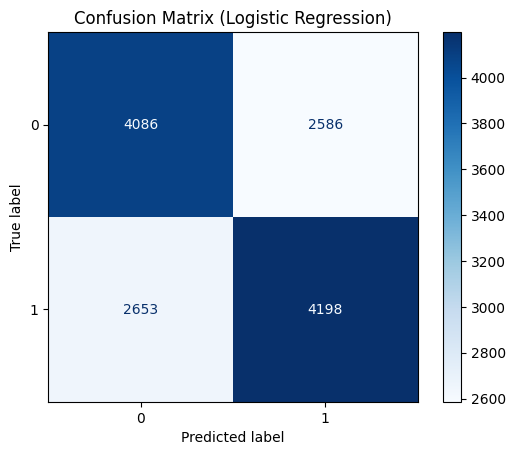

In [31]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

In [32]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
score = accuracy_score(y_test, y_pred)
accuracies["SVC"] = score
print("Accuracy: ", score)

Accuracy:  0.9511942616283369


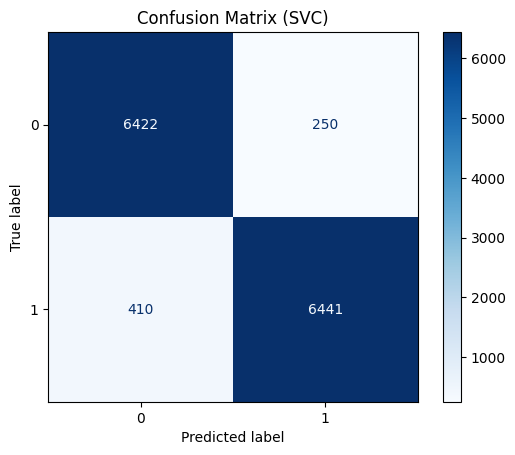

In [33]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (SVC)')
plt.show()

In [34]:
naive = GaussianNB()
naive.fit(X_train, y_train)
y_pred = naive.predict(X_test)
score = accuracy_score(y_test, y_pred)
accuracies["NB"] = score
print("Accuracy: ", score)

Accuracy:  0.5893662648820528


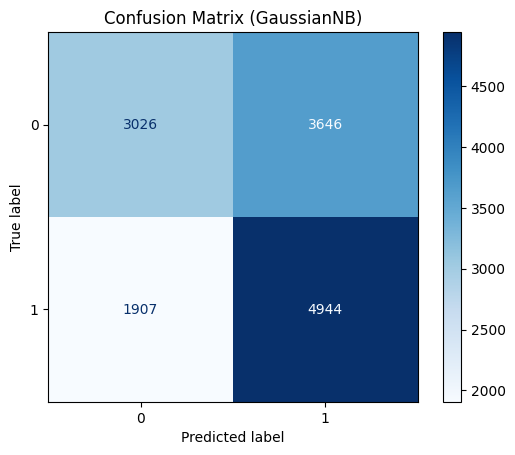

In [35]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (GaussianNB)')
plt.show()

In [36]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
score = accuracy_score(y_test, y_pred)
accuracies["GB"] = score
print("Accuracy: ", score)

Accuracy:  0.9012053538416032


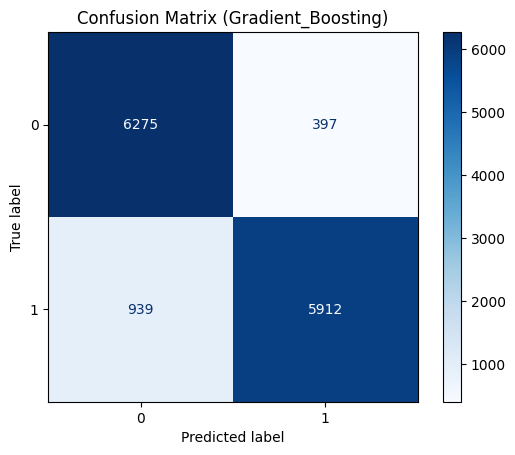

In [37]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Gradient_Boosting)')
plt.show()

In [38]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers
from keras.layers import Input

In [39]:
classifier = Sequential()
classifier.add(Input(shape=(X_train.shape[1],)))
classifier.add(Dense(units = 48, kernel_initializer = 'uniform', activation = 'relu')) # first hidden layer
classifier.add(Dense(units = 48, kernel_initializer = 'uniform', activation = 'relu')) # second hidden layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid')) # output layer
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 48)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 48)                  │           2,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              49 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,929 (11.44 KB)

 Trainable params: 2,929 (11.44 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
history = classifier.fit(X_train.astype('float64'), y_train.astype('float64'), batch_size = 32, epochs = 20, validation_split=0.2)

Epoch 1/20
1353/1353 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6708 - loss: 0.6001 - val_accuracy: 0.8290 - val_loss: 0.4027
Epoch 2/20
1353/1353 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8471 - loss: 0.3571 - val_accuracy: 0.9017 - val_loss: 0.2588
Epoch 3/20
1353/1353 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9084 - loss: 0.2381 - val_accuracy: 0.9361 - val_loss: 0.1785
Epoch 4/20
1353/1353 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9349 - loss: 0.1730 - val_accuracy: 0.9376 - val_loss: 0.1629
Epoch 5/20
1353/1353 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9492 - loss: 0.1425 - val_accuracy: 0.9598 - val_loss: 0.1227
Epoch 6/20
1353/1353 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9592 - loss: 0.1174 - val_accuracy: 0.9635 - val_loss: 0.1029
Epoch 7/20
1353/1353 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9653 - loss: 0.1034 - val_accuracy: 0.9638 - val_loss: 0.0979
Epoch 8/20
1353/1353 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9702 - loss: 0.0876 - 

In [41]:
y_pred_proba = classifier.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)
score = accuracy_score(y_test, y_pred)
accuracies["DL"] = score
print("Accuracy: ", score)

423/423 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy:  0.9884640982030615


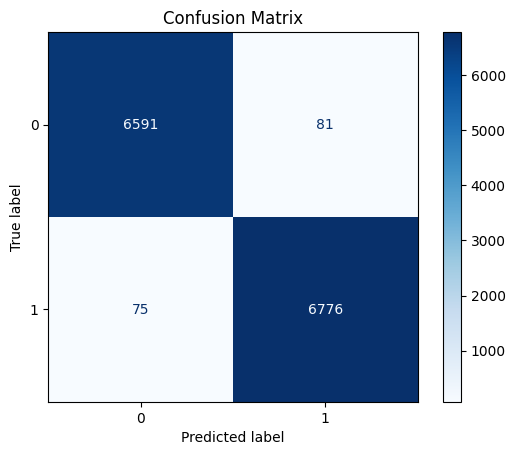

In [42]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [43]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_acc) + 1)

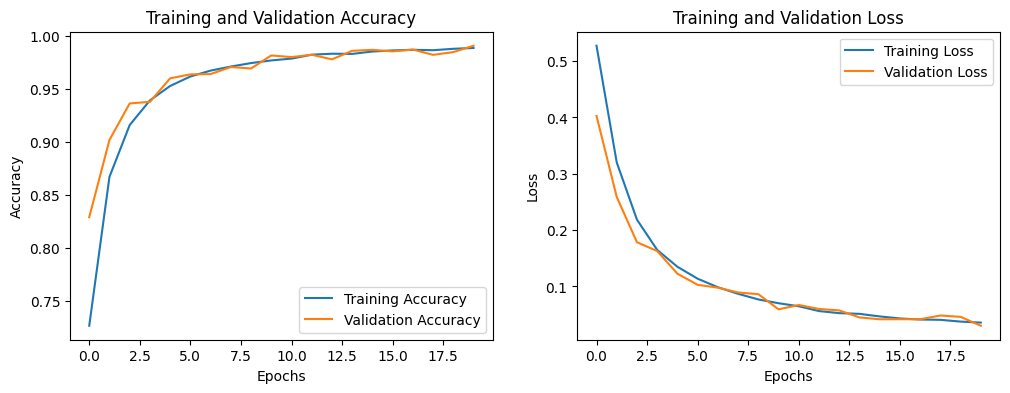

In [44]:
# Plot Training and Validation Accuracy over epochs
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy') 
plt.legend()

# Plot Training and Validation Loss over epochs
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [45]:
from sklearn.metrics import roc_curve, auc

In [46]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba.ravel())
roc_auc = auc(fpr, tpr)

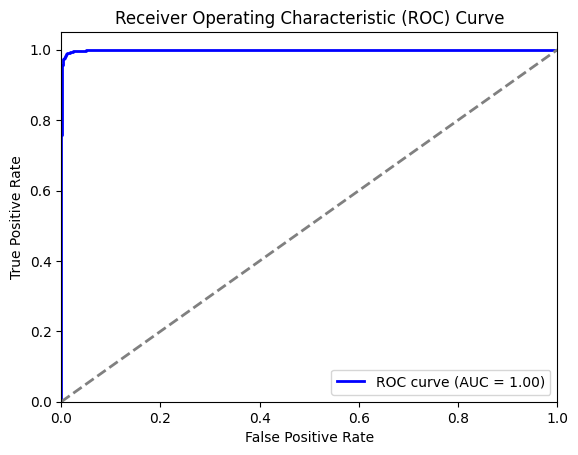

In [47]:
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Dashed line for random performance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

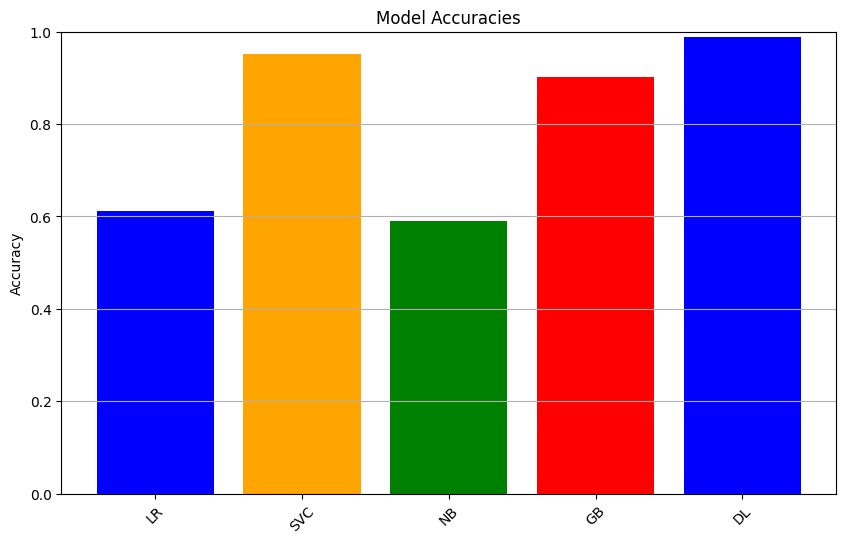

In [54]:
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'orange', 'green', 'red'])
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.ylim(0, 1)  # Set y-axis limits to be between 0 and 1
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')

plt.show()

In [48]:
import lime
from lime import lime_tabular

In [49]:
inter = lime_tabular.LimeTabularExplainer(
    training_data=np.asarray(X_train),
    feature_names=X_train.columns,
    class_names=["e", "p"],
    mode="classification")

In [50]:
#custom predic_proba function
def predict_proba(X):
    if X.ndim == 1:
        X = np.asarray(X).reshape(1, -1)
    prob_class_1 = classifier.predict(X)
    prob_class_0 = 1 - prob_class_1
    return np.hstack((prob_class_0, prob_class_1))

In [51]:
exp = inter.explain_instance(
    np.asarray(X_test)[0],
    predict_proba,               
)
exp.show_in_notebook(show_table = True)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [52]:
classifier.predict(np.asarray([np.asarray(X_test)[4]])).round()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[0.]], dtype=float32)